In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# check oof

In [10]:
oof_0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'oof_df.csv')
oof_1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'oof_df.csv')

In [13]:
oof_df = pd.concat([oof_0_df, oof_1_df], axis=0)

In [14]:
oof_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gadys gzan,0.769231,0
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0
2,1494472407,+62-879-37-82,,0.000000,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
...,...,...,...,...,...
16282,511547023,+48-4669-66949,+48-4669-66949,1.000000,1
16283,511622591,31 street marys street,eel s e,0.272727,1
16284,511623279,demarcus guzman,dehz,0.200000,1
16285,511654734,www.sherazie.com/meditsina2261,www.sherazie.com/medisina2261,0.966667,1


In [15]:
oof_df['sequence_id'].nunique()

33287

<Axes: ylabel='Frequency'>

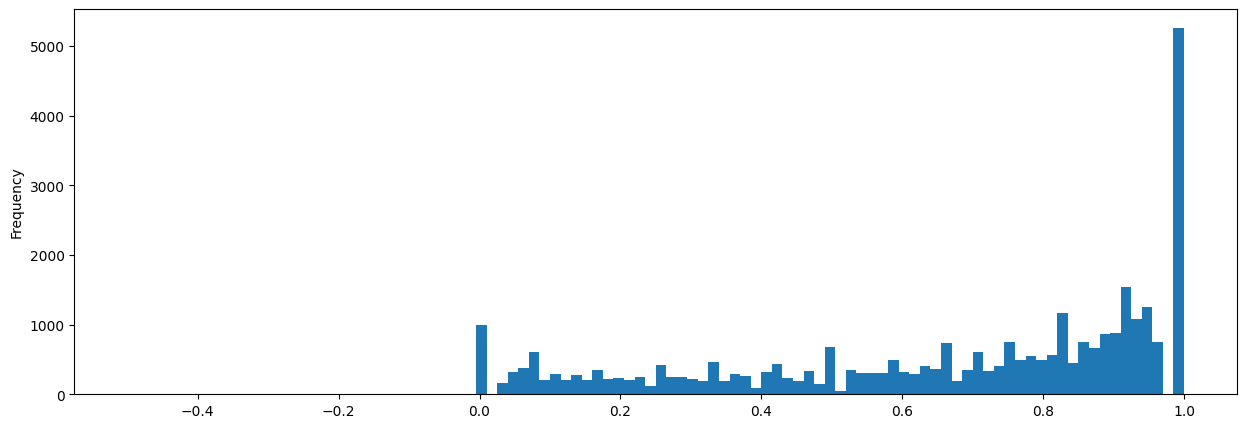

In [17]:
oof_df['score'].plot(kind='hist', bins=100, figsize=(15, 5))

# check score

In [6]:
valid_result_fold0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'valid_result.csv').fillna('').astype(str)

In [7]:
valid_result_fold0_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch10,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysan,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780ol d 3h,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,ww.ci-ycbcom/arduinopro,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulah rod,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7868 co road 3487,,78600348,7586001347,7758680roa48,57868ro348,786580roa348,78680r013487,78600a347,7868 0roa34,...,57868 co road 34,5786 oroa348,578658 co road 34,57868 co road 3488,7868 co road 348,5786 co road 348,786 co road 348,7868 co road 348,7868 co road 348,7868 co road 348
11285,kathleen peralta,,athlenperalta,athlenperalta,kathlen peralta,athlenperalta,athlen peralta,kathlenperalta,kathlenperalta,kathlen peralta,...,athlen peralta,kathlenperalta,pathlen peralta,kathlenperalta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta
11286,custo-de-vida,,cuatoeida,custo-de-vida,crsto-de-2ida,crsto-de-vida,crst-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,...,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida
11287,alexis good,,ecod,leisod,lexiood,exisco,id,leicood,leood,lxcood,...,leood,alexisood,lexiood,lexisood,lexis ood,lexisood,lexisood,lexis good,lexisood,lexis ood


In [8]:
from Levenshtein import distance as Lev_distance
def calculate_N_D(s1, s2):
    l = len(s1)
    lvd = Lev_distance(s1, s2)
    return lvd, l
    
global_N, global_D = 0, 0
for target_strings, predict_strings in valid_result_fold0_df[['target', 'pred_epoch5']].values:
    values = [calculate_N_D(target, predict) for target, predict in zip(target_strings, predict_strings)]
    global_D += np.sum([x[0] for x in values])
    global_N += np.sum([x[1] for x in values])

metric_value = np.clip((global_N - global_D) / global_N, a_min=0, a_max=1)

In [9]:
metric_value

0.3669542313243716